# Quantum Computing
For years on End in the physics field there have been studies in quantum mechanics .The idea of objects existing in two
places at a the same point in time is more thought provoking than it is mind blowing. Great physicists such as Roger Penrose,
Albert Einsten,Stephen Hawking ,Kip Thorne have dedicated their years to study this. Phenomena such as Quantum Entanglement
have been proven to be indeed true.
The field of Computing has borrowed from these Ideas and expounded on the idea of bits to come up with qubits.Quantum computers
exhibit the quantum mechanics phenomena and perfom physical simulations using qubits as their basic units

The main difference between a qubit and a bit is that a qubit can exist as a [0 1] while a classic bit can only exist as either 
 1 or 0 

# QUANTUM MACHINE LEARNING AND QUANTUM NEURAL NETWORKS ,QISKIT

# Quantum Machine Learning

Quantum Machine Learning  is an algorithm that integrates nothing from quantum computing and classic machine learning to open 
the way for new and improved learning schemes.These algorithms utilizes qubits and quantum operations or special quantum
systems to improve computations of data 
 
 # Quantum Neural Networks 
 
 Quantum Neural Networks  have similarities to the classical machine learning algorithms that are trained to find hidden
 patterns in data.
 These Neural Networks combine classical neural networks and pretrained quantum circuits ,they do this by loading
 the inputs usually (classical data) into a quantum state and process it with quantum gates parametrized by trainable weights.
 
 # What next after quantum state?
 After the circuits are parametrized into quantum states ,what follows is converting them into variational circuits using classical inputs after mapping them .
# Qiskit  library 
Developed by IBM Research ,the library has been written in python and is used to run  simulations on either a local machine or 
a quantum computer in the cloud.It is used to integrate data into basic QML(Quantum Machine Learning) workflows


# INSTALLATION AND HOW TO GO ABOUT IT 

# QISKIT MODULE 
# qiskit machine learning
The algorithms in the qiskit-machine-learning  are meant as application-agnostic computational units 
The module contains an interface and two specific implementations
The interface is a class where all QNNS inherit from ,more like nn.Module class in Pytorch.

The Implementations are of two types ,Estimator QNN and Sample QNN
The Estimator QNN are a group of variables based on the evaluation of quantum mechanical variables 
The Sampler QNN on the other hand are networks based on the samples resulting from measuring a quantum circuit

# qiskit primitives
The above implementations are based on primitives .Primitives are the entry points into a simulator or quantum computer hardwares.Each implementation takes an instance of the corresponding primitive.
The Estimator QNN subclasses(Base Estimator) while The Sampler QNN subclasses(Base Sampler ) respectively.

Like the pytorch Neural Networks ,QNN Class performs a forward and backward pass given a set of inputs and trainable weights 

# ESTIMATOR QNN :: 

The Estimator QNN is based on the evaluation of quantum variables .This subclass takes in a parametrized quantum circuit 
as input as well as an optional quantum mechanical observable  and outputs expectation values in the forward pass .

In [24]:
# Installing qiskit and the qnn class 
import qiskit
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 42
# initializing random weights 

In [25]:
# Instantiating our variables
qc = QuantumCircuit(1)
qc.h(0)
parameters  = [Parameter("input1"),Parameter("weight1"),Parameter("Height")]

In [26]:
# We need to set a random seed so our values dont change 
import random
random.seed(42)
qc.ry(parameters[0],0)
qc.rx(parameters[1],0) 

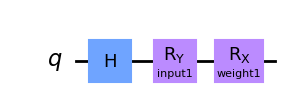

In [27]:
# plotting out our values
qc.draw("mpl")

# Estimator QNN Observable
This Network expect us to have an observable whic we  can use to define  an expectation  value.The good thing is that even if we fail to create an observable ,the network creates on for us by default.
However we  can create oneby using the SparsePauliOp

In [28]:
# import SparsePauliOp
from qiskit.quantum_info import SparsePauliOp

In [29]:
# create an observable
observable = SparsePauliOp.from_list([('Y'*qc.num_qubits,1)])

In [30]:
!pip install qiskit_machine_learning

In [31]:
#importing Estimator QNN
# Estimator QNN subclasses the QNN class
from qiskit_machine_learning.neural_networks import EstimatorQNN
estimator_qnn = EstimatorQNN(circuit=qc,observables=observable,input_params=[parameters[0]],weight_params=[parameters[1]])
estimator_qnn

# FORWARD PASS FOR ESTIMATOR QNN
# Basic Forward Pass

In [33]:
estimator_qnn_input =algorithm_globals.random.random(estimator_qnn.num_inputs)
estimator_qnn_weights = algorithm_globals.random.random(estimator_qnn.num_weights)
estimator_qnn_forward =estimator_qnn.forward(estimator_qnn_input,estimator_qnn_weights)

print(f"Results from the Forward Pass{estimator_qnn_forward}and the shape is {estimator_qnn_forward.shape}")

Results from the Forward Pass[[0.48610038]]and the shape is (1, 1)


# Batched Forward Pass

In [35]:
estimator_qnn_forward_batched =estimator_qnn.forward([estimator_qnn_input,estimator_qnn_weights],estimator_qnn_weights)
print(f"Results from the Forward Pass{estimator_qnn_forward_batched.shape}and the shape is {estimator_qnn_forward_batched.shape}")

Results from the Forward Pass(2, 1)and the shape is (2, 1)


# REFERENCES

https://qiskit.org/ecosystem/machine-learning/tutorials/01_neural_networks.html  : date accesed 28/7/2023
https://en.wikipedia.org/wiki/Quantum_machine_learning